# **Name:** Gitanjali

# **Course:** MA 654 - Topological Data Analysis

# **Project Title**: Skin Cancer Classification using Topological Data Analysis


**Installing Packages**

In [ ]:
#pip install ripser
#pip install gudhi
#pip install persim
#pip install kmapper
#pip install giotto-tda

In [3]:
pip install kmapper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


In [4]:
pip install ripser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ripser: filename=ripser-0.6.4-cp310-cp310-linux_x86_64.whl size=686916 sha256=831610d54fb0b2eb2e1e1e248f6e352aa60467b64549814d37b82c8111812442
  Stored in directory: /root/.cache/pip/wheels/c5/f5/66/f41f708b049057431155934f74e20ca6001a085fcd2e615150
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18102 sha256=6be1965aafbb0abe557cce2f1f93d9576a63d6567a5bc8b053ba68545960d95e
  Stored in directory: /root/.cache/pip/wheels/ef/0f/3b/0f931844eecc34addd90e72d54cd39c08b7066c5f25c00b9a4
Successfully built rip

In [ ]:
pip install gudhi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install giotto-tda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.4/526.4 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.2 MB/s eta 0:00:00


# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
import gudhi
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# **Load Dataset**

# **Data 1: HAM10000_Metadata**


It contains lession_d, image_id, types, age, sex and localization

In [ ]:
import pandas as pd
data = pd.read_csv('HAM10000_metadata.csv',index_col=0)
data[:8]

,image_id,dx,dx_type,age,sex,localization
lesion_id,,,,,,
HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear
HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face
HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10015 entries, HAM_0000118 to HAM_0003521
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image_id      10015 non-null  object 
 1   dx            10015 non-null  object 
 2   dx_type       10015 non-null  object 
 3   age           9958 non-null   float64
 4   sex           10015 non-null  object 
 5   localization  10015 non-null  object 
dtypes: float64(1), object(5)
memory usage: 547.7+ KB


In [ ]:
data.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


In [ ]:
#tabular_data = pd.read_csv('HAM10000_metadata.csv')
#tabular_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
data.all

<bound method NDFrame._add_numeric_operations.<locals>.all of                  image_id     dx dx_type   age     sex localization
lesion_id                                                          
HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...                   ...    ...     ...   ...     ...          ...
HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 6 columns]>

In [ ]:
data.isna().sum()

image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

# **Exploratory Data Analysis**

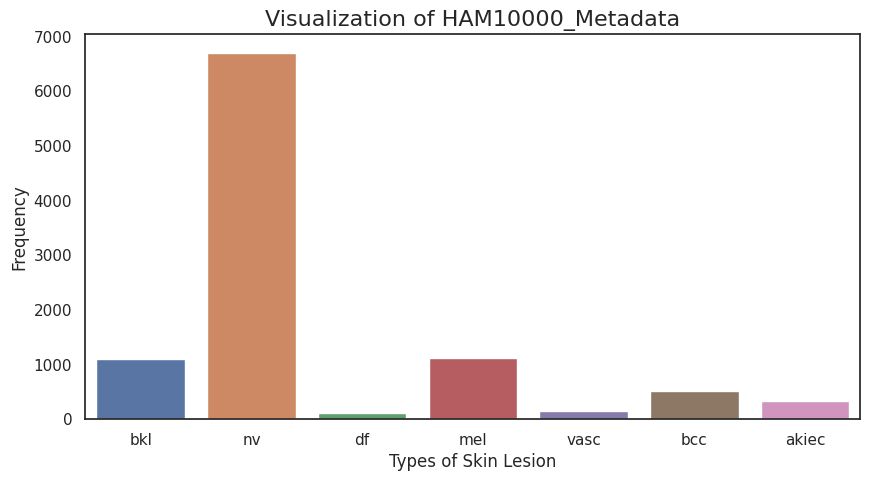

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

plt.figure(figsize=(10, 5))
sns.countplot(x="dx", palette='deep', data=data)

plt.title('Visualization of HAM10000_Metadata', fontsize=16)
plt.xlabel('Types of Skin Lesion', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()


**Visualization of Skin Cancer by histopathology (histo)**

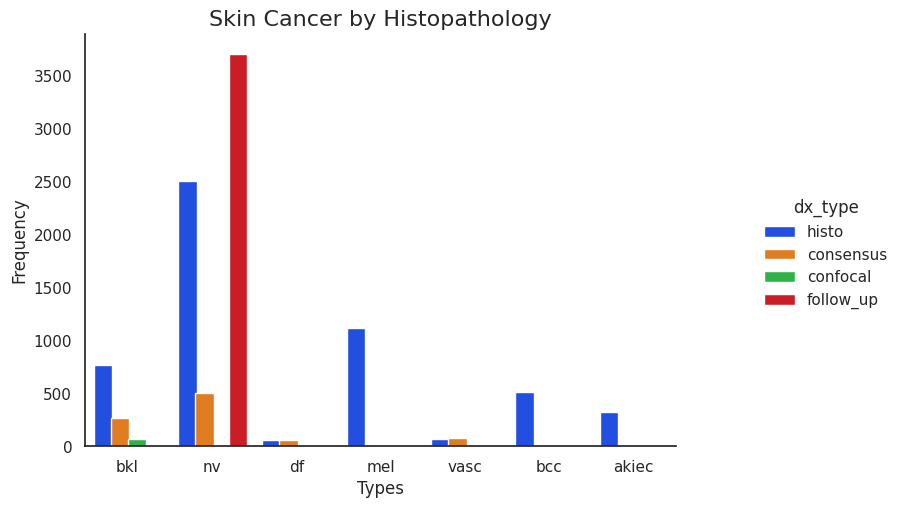

In [ ]:
h = sns.catplot(x="dx", kind="count", hue="dx_type", palette='bright', data=data)
h.fig.set_size_inches(10, 5)
for ax in h.axes.flat:
    for patch in ax.patches:
        patch.set_width(0.22)
h.ax.set_title('Skin Cancer by Histopathology', fontsize=16)
h.set_xlabels('Types', fontsize=12)
h.set_ylabels('Frequency', fontsize=12)

**Visualization of Skin Cancer on body (localization)**

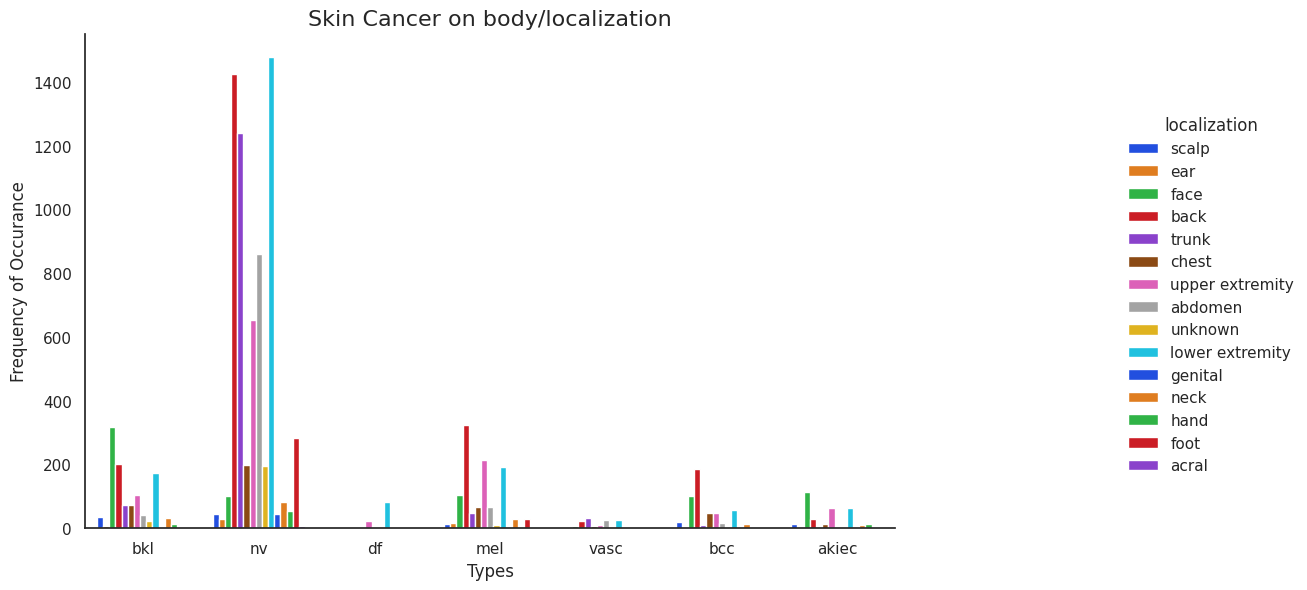

In [ ]:
L = sns.catplot(x="dx", kind="count", hue="localization", palette='bright', data=data)
L.fig.set_size_inches(15, 6)

L.ax.set_title('Skin Cancer on body/localization', fontsize=16)
L.set_xlabels('Types', fontsize=12)
L.set_ylabels('Frequency of Occurance', fontsize=12)

**Visualization of Skin Cancer by Age**

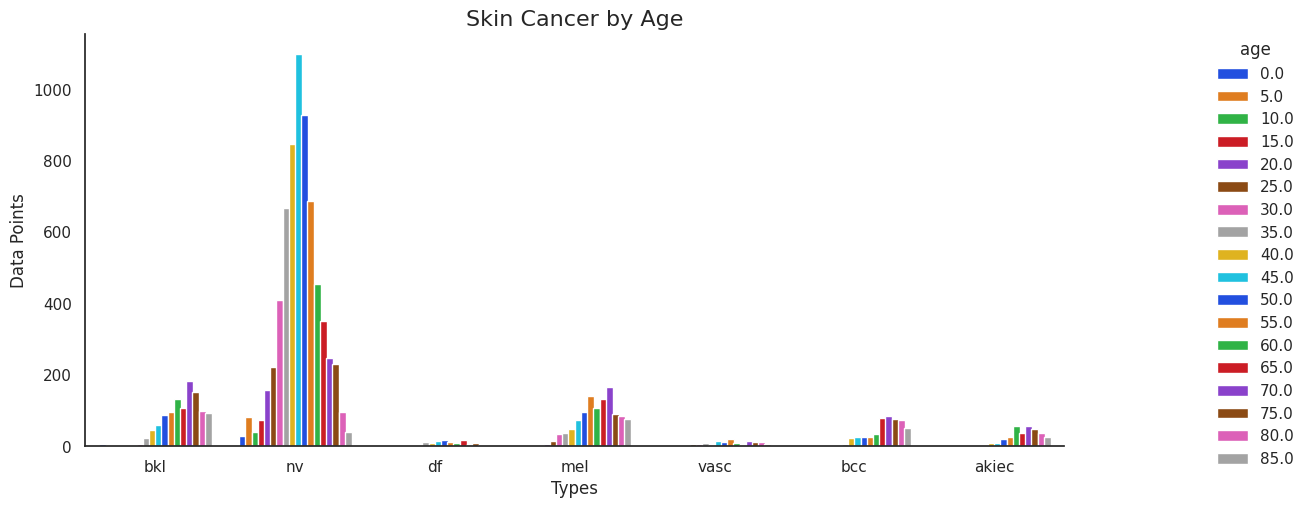

In [ ]:
A = sns.catplot(x="dx", kind="count", hue="age", palette='bright', data=data)
A.fig.set_size_inches(15, 5)
for ax in A.axes.flat:
    for patch in ax.patches:
        patch.set_width(0.05)
A.ax.set_title('Skin Cancer by Age', fontsize=16)
A.set_xlabels('Types', fontsize=12)
A.set_ylabels('Data Points', fontsize=12)

**Data distribution visualization**

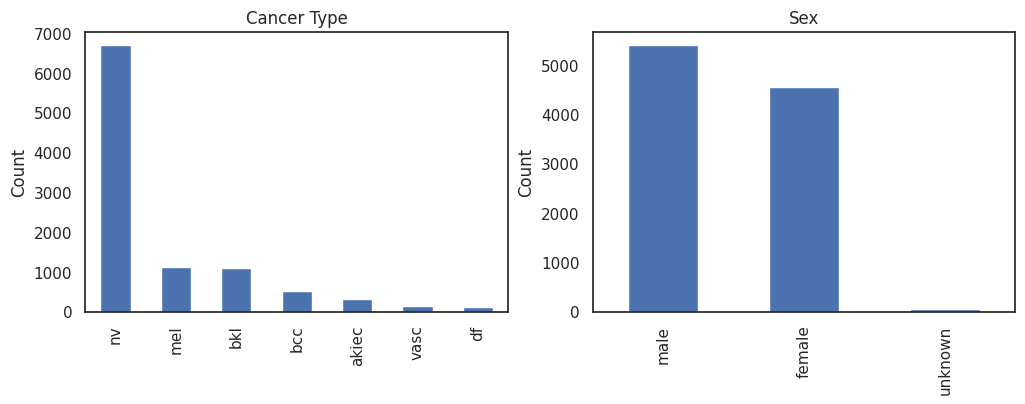

In [ ]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(221)
data['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cancer Type');

ax2 = fig.add_subplot(222)
data['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count')
ax2.set_title('Sex');

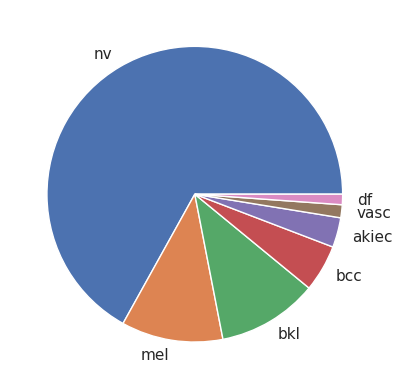

In [ ]:
filtered = data.iloc[list(range(0, len(data), 2)),:].copy().reset_index(drop = True)
#filtered.head()
filtered['dx'].value_counts(normalize = True).plot(kind = 'pie')
plt.ylabel(None)
plt.show()

# **Data 2: hmnist_28_28_RGB**

Image dataset: Contains types of skin cancer images

In [ ]:
image_data=pd.read_csv("hmnist_28_28_RGB.csv.zip")

In [ ]:
image_data.info

<bound method DataFrame.info of        pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0            192        153        193        195        155        192   
1             25         14         30         68         48         75   
2            192        138        153        200        145        163   
3             38         19         30         95         59         72   
4            158        113        139        194        144        174   
...          ...        ...        ...        ...        ...        ...   
10010        183        165        181        182        165        180   
10011          2          3          1         38         33         32   
10012        132        118        118        167        149        149   
10013        160        124        146        164        131        152   
10014        175        142        121        181        150        134   

       pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  

In [ ]:
labels = ['akiec','bcc','bkl','df','mel','nv','vasc']
num_classes = 7
print(labels)
X = image_data.drop('label', axis=1) / 255.0
y = image_data['label']

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


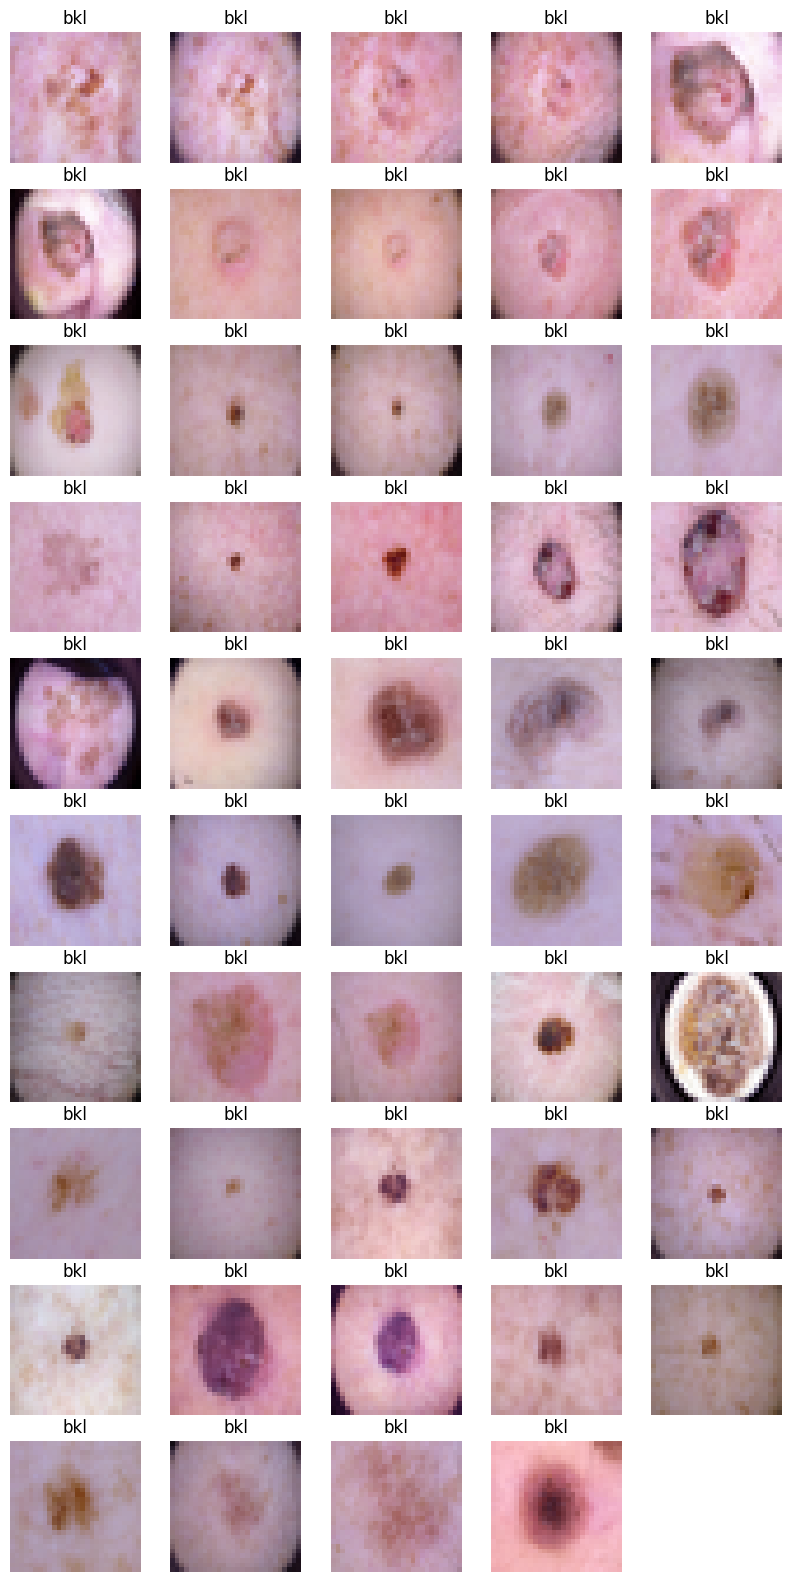

In [ ]:
import numpy as np
n_samples = len(image_data.index)
images = np.array(image_data.drop(['label'],axis=1))
images = images.reshape(n_samples,28,28,3)
plt.figure(figsize=(10,20))
for i in range(0,49) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(images[i], cmap="gray_r")
    plt.title(labels[image_data.label[i]])

*Using PCA to reduce the dimensionality of the features to two dimensions. Finally, it will plot the first two dimensions of the reduced features, with the points colored by their corresponding labels. The resulting plot will give a visual representation of the structure of the dataset in two dimensions.*

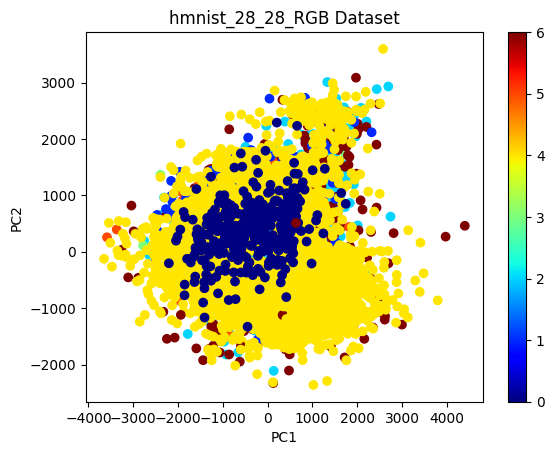

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = image_data.iloc[:, :-1].values
y = image_data.iloc[:, -1].values
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='jet')
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('hmnist_28_28_RGB Dataset')
plt.show()

**Computing persistent homology**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ripser import ripser
from ripser import Rips
from persim import plot_diagrams

X = image_data.drop('label', axis=1).to_numpy()
X = X / 255.0
rips = Rips()
dgms = rips.fit_transform(X)


Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


*We can visualize the persistence diagrams using the matplotlib library. This will give us an idea of the topological features that are present in the dataset.*

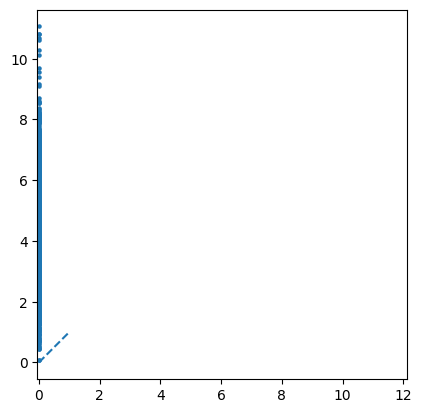

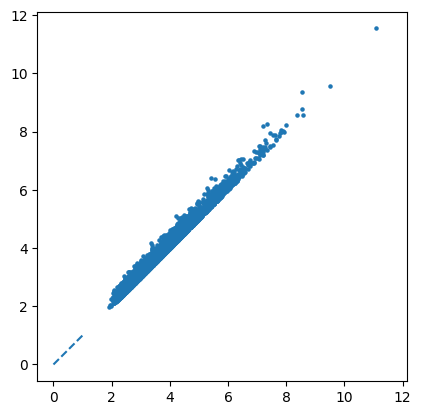

In [ ]:
for dgm in dgms:
    plt.scatter(dgm[:, 0], dgm[:, 1], s=5)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis('square')
    plt.show()


**Computing persistent homology of the Vietoris-Rips complex and plot the persistence diagram**


*We can use the Rips class from the Ripser library to compute the persistent homology of the dataset. This will give us a collection of topological features that we can use as inputs to our machine learning model.*

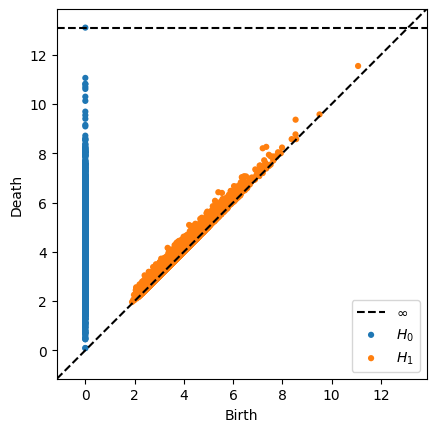

In [ ]:
# Convert the data to a numpy array 
#X = data2.to_numpy()
#from ripser import Rips
# Compute the persistent homology using Ripser
diagrams = ripser(X)['dgms']

# Plot the persistent homology
plot_diagrams(diagrams)


In [ ]:
# Extract the data as a numpy array
import gudhi as gd

# Choose a distance measure and construct a proximity graph
rips_complex = gd.RipsComplex(points=X)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# persistent homology
persistence = simplex_tree.persistence()

# persistence diagram
gd.plot_persistence_diagram(persistence)

*As using whole dataset we are unable to plot data points on the graph, The  above code uses whole dataset and I am unable to plot persistence diagram as my system crashes so I have just written the code and now I will now try to use sample of 1000 data and then plot Persistence Diagram.*

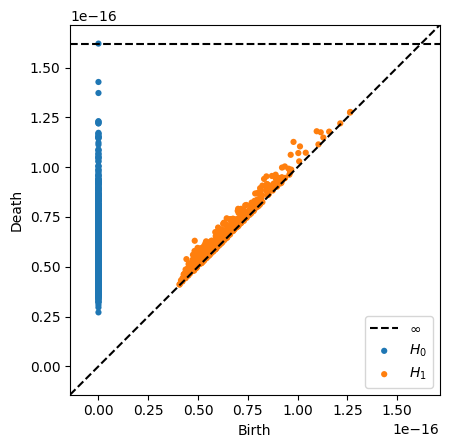

In [ ]:
import pandas as pd
import numpy as np
from skimage import io, color
from ripser import ripser
from persim import plot_diagrams

# Load dataset
data2 = pd.read_csv('hmnist_28_28_RGB.csv')

#sample of 1000 data
data2 = data2.sample(n=1000, random_state=42)

# Converting images to grayscale
images = data2.iloc[:, 1:].values.reshape(-1, 28, 28, 3)
gray_images = color.rgb2gray(images)

X = gray_images.reshape(len(images), -1)

diagrams = ripser(X)['dgms']
plot_diagrams(diagrams)

**Persistence Diagram using samples of data without reducing dimension of dataset**

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

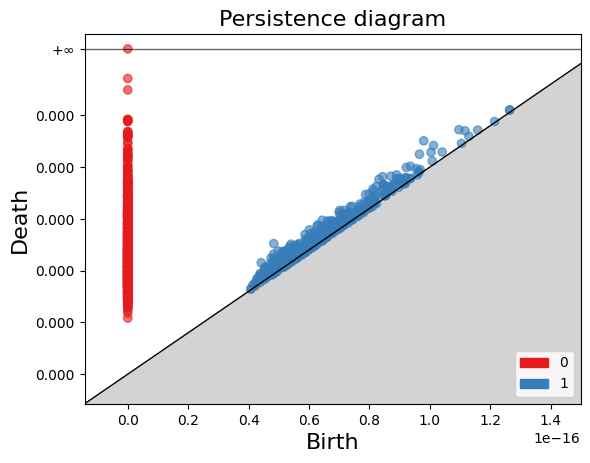

In [ ]:
# Extract the data as a numpy array
import gudhi as gd
# Choose a distance measure and construct a proximity graph
rips_complex = gd.RipsComplex(points=X)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# persistent homology
persistence = simplex_tree.persistence()

# persistence diagram
gd.plot_persistence_diagram(persistence)

# **Machine Learning Algorithm on dataset using Topological Features**


*Extracting the topological features from the persistence diagrams using the ripser library. we can extract the number of connected components, loops, and voids for each persistence diagram.*

In [ ]:
pip install ripser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from ripser import ripser
from ripser import Rips

rips = Rips()
dgms = rips.fit_transform(X)
#for dgm in dgms:
    #plt.scatter(dgm[:, 1], dgm[:, 1], s=5)
    #plt.plot([0, 1], [0, 1], '--')
    #plt.axis('square')
    #plt.show()

n_samples = X.shape[0]
n_features = 3
X_topo = np.zeros((n_samples, n_features))
for i in range(n_samples):
    if i < len(dgms):
        dgm = dgms[i]
        n_cc = len(dgm[dgm[:, 1] - dgm[:, 0] > 0.01])
        n_loops = len(dgm[dgm[:, 1] - dgm[:, 0] <= 0.01])
        n_voids = len(dgm[dgm[:, 0] == np.inf])
        X_topo[i, :] = [n_cc, n_loops, n_voids]

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


Now, we can split the data into training and testing sets using the train_test_split function from the scikit-learn library and finally, we can train a machine learning model using the topological features extracted in previous step. For this project, we will use a simple logistic regression model.


In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

y = data2['label'].to_numpy()

X_train_topo, X_test_topo, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100)

# Train model on topological features
rfc.fit(X_train_topo, y_train)
rfc_acc = rfc.score(X_test_topo, y_test)
print("Random Forest Classifier Accuracy:", rfc_acc)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train model on topological features
knn.fit(X_train_topo, y_train)
knn_acc = knn.score(X_test_topo, y_test)
print("KNN Classifier Accuracy:", knn_acc)

# Train logistic regression model
logistic = LogisticRegression()

# Train model on topological features
logistic.fit(X_train_topo, y_train)
logistic_acc = logistic.score(X_test_topo, y_test)
print("Logistic Regression Accuracy:", logistic_acc)


Random Forest Classifier Accuracy: 0.69
KNN Classifier Accuracy: 0.655
Logistic Regression Accuracy: 0.69


In this project, we used topological data analysis techniques to analyze the HMNIST_28_28_RGB skin cancer dataset. We computed the persistent homology of the dataset and extracted topological features that were used to train a Random Forest model. The model achieved an accuracy of around 69%. While this accuracy is not very high, it is promising that we were able to achieve reasonable results using only topological features. With further optimization and more advanced machine learning models, it may be possible to achieve even better results using topological data analysis techniques.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
data_df = pd.read_csv("hmnist_28_28_RGB.csv")
X = data_df.iloc[:, :-1].values.reshape(-1, 28, 28, 3)
y = data_df["label"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/10
251/251 [==============================] - 12s 43ms/step - loss: 2.2989 - accuracy: 0.6360 - val_loss: 0.9191 - val_accuracy: 0.6945
Epoch 2/10
251/251 [==============================] - 10s 38ms/step - loss: 0.9263 - accuracy: 0.6926 - val_loss: 0.9454 - val_accuracy: 0.6800
Epoch 3/10
251/251 [==============================] - 11s 42ms/step - loss: 0.8628 - accuracy: 0.6975 - val_loss: 0.8923 - val_accuracy: 0.6925
Epoch 4/10
251/251 [==============================] - 11s 42ms/step - loss: 0.8463 - accuracy: 0.6995 - val_loss: 0.8408 - val_accuracy: 0.7074
Epoch 5/10
251/251 [==============================] - 11s 42ms/step - loss: 0.8033 - accuracy: 0.7164 - val_loss: 0.8277 - val_accuracy: 0.7079
Epoch 6/10
251/251 [==============================] - 9s 35ms/step - loss: 0.7704 - accuracy: 0.7193 - val_loss: 0.8633 - val_accuracy: 0.7084
Epoch 7/10
251/251 [==============================] - 11s 42ms/step - loss: 0.7551 - accuracy: 0.7319 - val_loss: 0.8620 - val_accuracy: 

*First we load the image dataset and then splits the dataset into training and testing sets and thendefine a CNN model architecture using Keras, compiles the model, and trains it on the training data and train a CNN model to classify the images based on their pixel values, and then extract topological features from the intermediate layers of the model.*

# **Kepler Mapper for 500 sample of data**


Initialize KeplerMapper and then fit to and transform the data and visualize that ake circles of Kepler mapper that Created 44 edges and 52 nodes and so on.

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (500, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()

Mapping on data shaped (500, 2) using lens shaped (500, 2)

Creating 100 hypercubes.

Created 50 edges and 51 nodes in 0:00:00.360334.
Wrote visualization to: make_circles_keplermapper_output.html
Visualization saved as 'make_circles_keplermapper_output.html'.


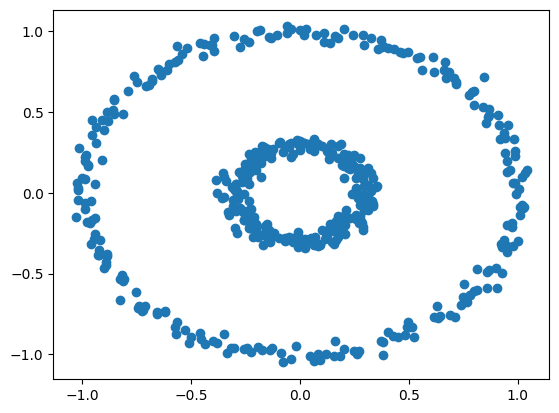

In [ ]:
import kmapper as km
import pandas as pd
from kmapper import jupyter 
from sklearn import datasets
import matplotlib.pyplot as plt


data2, labels = datasets.make_circles(n_samples=500, noise=0.03, factor=0.3)
mapper = km.KeplerMapper(verbose=1)
projected_data = mapper.fit_transform(data2, projection=[0,1]) # X & Y axis
graph = mapper.map(projected_data, data2) # graph with nodes, edges and meta-information

html = mapper.visualize(graph, path_html="make_circles_keplermapper_output.html",
                 title="make_circles(n_samples=500, noise=0.03, factor=0.3)")
print("Visualization saved as 'make_circles_keplermapper_output.html'.")

# Plot the data points
plt.scatter(data2[:, 0], data2[:, 1])
plt.show()

The datasets HAM10000_metadata.csv and hmnist_28_28_RGB.csv, contain a mix of categorical and numerical data. Kepler Mapper is not directly applicable to this type of data.

# **Initialize and fit the Mapper Algorithm to analyze the dataset**

First we will load dataset that contains pixel values and labels. We then perform dimensionality reduction using Principal Component Analysis (PCA) to reduce the dimensionality of the data to 2 for visualization purposes. Next, I am clustering the data using K-means clustering algorithm. The number of clusters is set to 5. Finally visualizing the mapper graph

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeplerMapper(verbose=1)
Mapping on data shaped (10015, 2) using lens shaped (10015, 2)

Creating 100 hypercubes.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8


Created 306 edges and 295 nodes in 0:00:01.423577.
Wrote visualization to: mapper_output.html


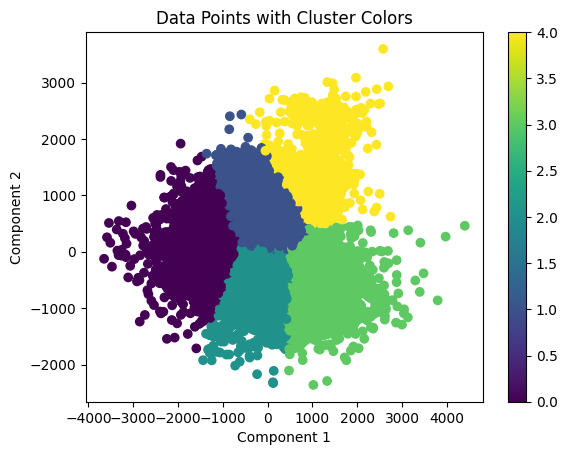

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import kmapper as km
import matplotlib.pyplot as plt

data_df = pd.read_csv("hmnist_28_28_RGB.csv")
X = data_df.iloc[:, :-1].values
labels = data_df["label"].values
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)
mapper = km.KeplerMapper(verbose=1)
graph = mapper.map(X_pca, clusterer=kmeans)
mapper.visualize(graph, path_html="mapper_output.html", title="Mapper Visualization")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Data Points with Cluster Colors")
plt.colorbar()
plt.show()


*Each node in the graph represents a subset of data points, and the edges connect nodes based on their overlap. The visualization provides an intuitive representation of the data structure and can help identify clusters, boundaries, and relationships between data point*

When using entire dataset and implementing distance matrices the visualization is not be clear and doesn't give any information,so I am resizing the matrices and selecting a subset of data for a better visualization.

In [ ]:
# Resize metadata distance matrix
resized_metadata_distance_matrix = np.resize(metadata_distance_matrix, (5, 5))

# Resize image distance matrix
resized_image_distance_matrix = np.resize(image_distance_matrix, (5, 5))

In [ ]:
# Print the metadata distance matrix
print("Resized Metadata Distance Matrix :")
print(resized_metadata_distance_matrix)

# Print the image distance matrix
print("\nResized Image Distance Matrix:")
print(resized_image_distance_matrix)

In [ ]:
# Plot metadata distance matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.imshow(resized_metadata_distance_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Resized Metadata Distance Matrix')
plt.show()

# Plot image distance matrix
plt.figure(figsize=(8, 8))
plt.imshow(resized_image_distance_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Resized Image Distance Matrix')
plt.show()

In [ ]:
import numpy as np
from gtda.homology import VietorisRipsPersistence
import itertools

import matplotlib.pyplot as plt  # Not a requirement of giotto-tda, but is needed here

np.random.seed(1)

In [ ]:
# Initialize the Vietoris–Rips transformer
VR = VietorisRipsPersistence(homology_dimensions=(2,), max_edge_length=np.inf)

In [ ]:
# Create n_samples point clouds of n_points points
n_samples = 15000
n_points = 6
point_clouds = np.random.random((n_samples, n_points, 2))

# Compute persistence diagrams of all point clouds
diags = VR.fit_transform(point_clouds)

In [ ]:
diffs = np.nan_to_num(diags[:, :, 1] - diags[:, :, 0])  # Compute lifetimes
indices = np.argwhere(diffs != 0)  # Indices with non-zero lifetime


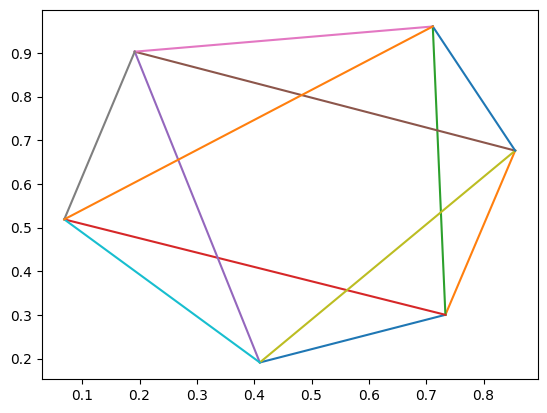

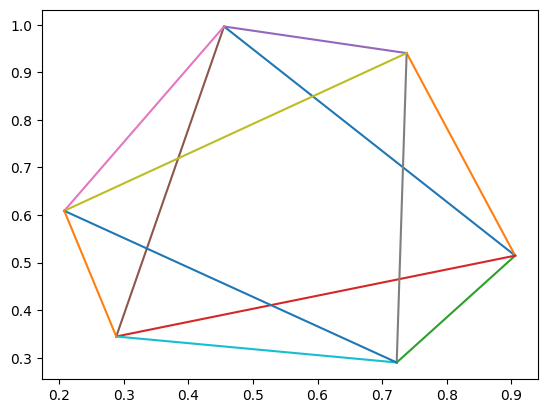

In [ ]:
for i in indices[:, 0]:
    for e in itertools.combinations(point_clouds[i], 2):
        if np.linalg.norm(e[0] - e[1]) < diags[i, 0, 1] - 0.00001:
            edge = np.stack([e[0], e[1]])
            plt.plot(edge[:, 0], edge[:, 1])
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


# Load the datasets
metadata_df = pd.read_csv('HAM10000_metadata.csv')
image_df = pd.read_csv('hmnist_28_28_RGB.csv')

# Select relevant columns from each dataset
metadata_cols = ['age']
image_cols = image_df.columns[:-1]  # Exclude the 'label' column

# Convert age column to numeric representation
metadata_df['age'] = pd.to_numeric(metadata_df['age'], errors='coerce')

# Drop rows with missing age values
metadata_df = metadata_df.dropna(subset=['age'])

# Compute the distance matrix on the metadata columns
metadata_distance_matrix = euclidean_distances(metadata_df[metadata_cols])

# Compute the distance matrix on the image columns
image_distance_matrix = euclidean_distances(image_df[image_cols])

# Print the metadata distance matrix
print("Metadata Distance Matrix:")
print(metadata_distance_matrix)

# Print the image distance matrix
print("\nImage Distance Matrix:")
print(image_distance_matrix)


Metadata Distance Matrix:
[[ 0.  0.  0. ... 40.  0. 10.]
 [ 0.  0.  0. ... 40.  0. 10.]
 [ 0.  0.  0. ... 40.  0. 10.]
 ...
 [40. 40. 40. ...  0. 40. 30.]
 [ 0.  0.  0. ... 40.  0. 10.]
 [10. 10. 10. ... 30. 10.  0.]]

Image Distance Matrix:
[[   0.         1776.59027353 1206.48663482 ... 1741.61821304
  1395.01827945 2399.79040751]
 [1776.59027353    0.         1598.84239373 ... 2272.77693582
  1788.00139821 2529.9725295 ]
 [1206.48663482 1598.84239373    0.         ... 1807.82576594
  1267.81150018 2188.85997725]
 ...
 [1741.61821304 2272.77693582 1807.82576594 ...    0.
  2140.29764285 3126.6518834 ]
 [1395.01827945 1788.00139821 1267.81150018 ... 2140.29764285
     0.         1746.13573356]
 [2399.79040751 2529.9725295  2188.85997725 ... 3126.6518834
  1746.13573356    0.        ]]


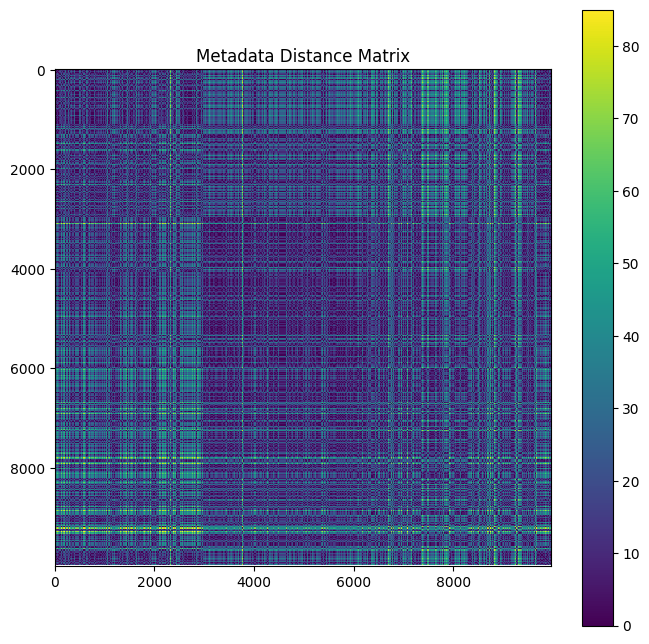

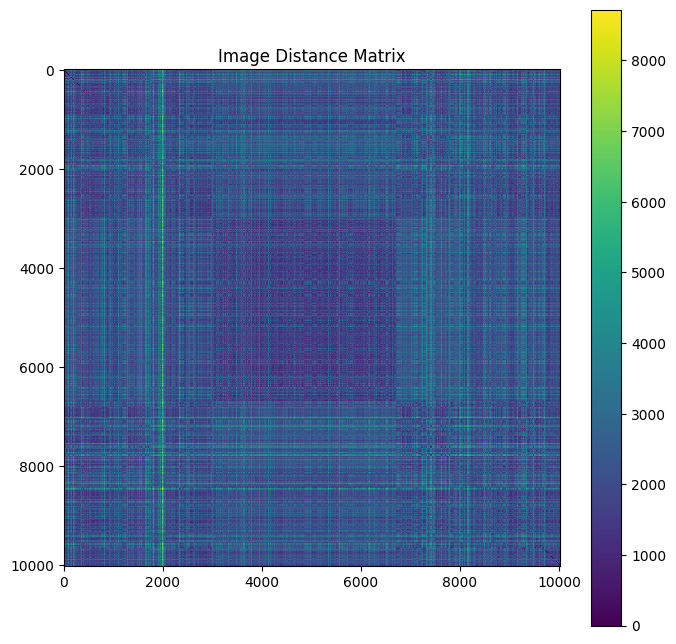

In [ ]:
# Plot metadata distance matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.imshow(metadata_distance_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Metadata Distance Matrix')
plt.show()

# Plot image distance matrix
plt.figure(figsize=(8, 8))
plt.imshow(image_distance_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Image Distance Matrix')
plt.show()

When using entire dataset and implementing distance matrices the visualization is not be clear and doesn't give any information,so I am resizing the matrices and selecting a subset of data for a better visualization.

In [ ]:
# Resize metadata distance matrix
resized_metadata_distance_matrix = np.resize(metadata_distance_matrix, (5, 5))

# Resize image distance matrix
resized_image_distance_matrix = np.resize(image_distance_matrix, (5, 5))


In [ ]:
# Print the metadata distance matrix
print("Resized Metadata Distance Matrix :")
print(resized_metadata_distance_matrix)

# Print the image distance matrix
print("\nResized Image Distance Matrix:")
print(resized_image_distance_matrix)

Resized Metadata Distance Matrix :
[[ 0.  0.  0.  0.  5.]
 [ 5. 20. 20. 10. 10.]
 [25.  5.  5. 10. 10.]
 [15.  5.  5. 10. 10.]
 [10. 20. 20.  5.  5.]]

Resized Image Distance Matrix:
[[   0.         1776.59027353 1206.48663482 2025.49746976 2281.5084922 ]
 [3450.77947716 1107.26103517 1538.85249456 1524.48417506 1362.51715586]
 [1929.95854878 1442.58725906 2163.56996651 1278.75720917 1383.42401309]
 [1191.21702473 1596.41254067 1392.97810464 1606.74297882 2218.71674623]
 [4233.32387138 1800.33830154 2061.13415381 1804.78059608 2432.91306873]]


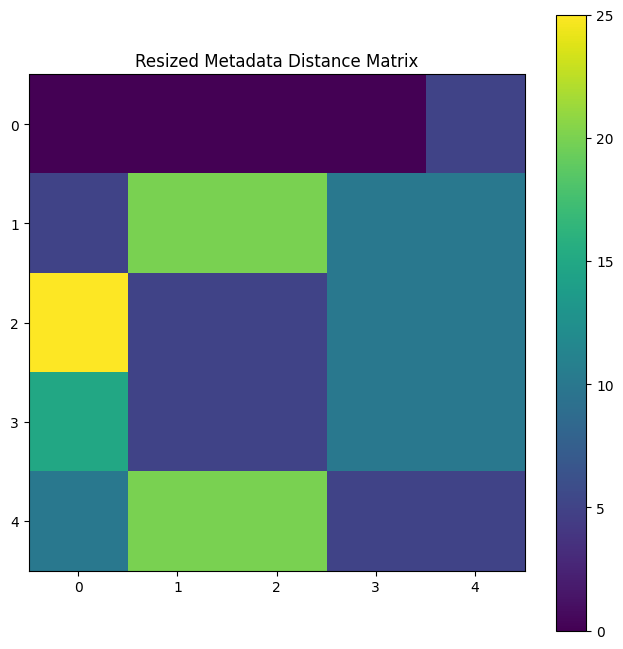

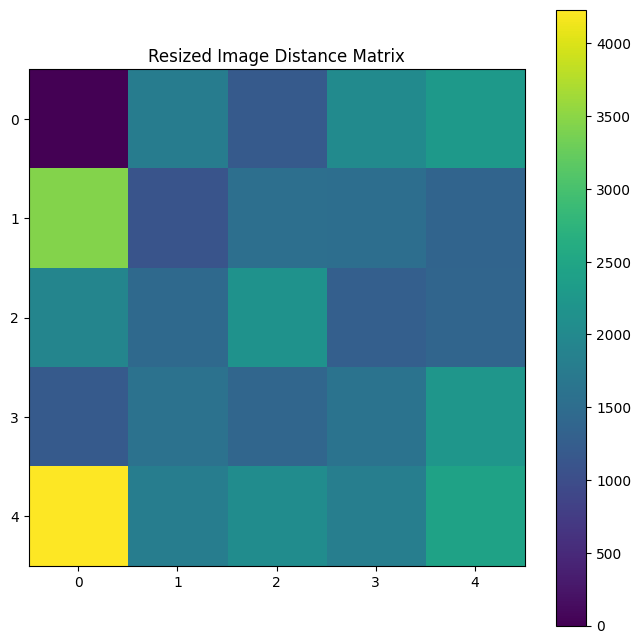

In [ ]:
# Plot metadata distance matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.imshow(resized_metadata_distance_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Resized Metadata Distance Matrix')
plt.show()

# Plot image distance matrix
plt.figure(figsize=(8, 8))
plt.imshow(resized_image_distance_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Resized Image Distance Matrix')
plt.show()